# (1.0) Установка пакетов

In [1]:
import numpy as np
import pandas as pd

# (1.1) Список датафреймов

X1 - исходный датафрейм  
X1_N - датафрейм с нормированными переменными  
X1_PCA - исходный датафрейм с новой переменной, созданной на основании скоррелированных переменных  
X1_N_PCA - датафрейм с нормированными переменными и с новой переменной, созданной на основании скоррелированных переменных  
X1_COR - исходный датафрейм с удаленными скоррелированными переменными  
X1_N_COR - датафрейм с нормированными переменными с удаленными скоррелированными переменными

# (1.1) Загрузка данных

In [2]:
X1 = pd.read_csv('ML.csv', sep=";")
X1.head(1)

,SIGNAL_ID,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,RATINGCROSSDEALRATIOS,RATINGEPSILONE,...,RATINGAVGLIFETIME,RATINGAGTDEVPRICE,RATINGAGTDEVVOL,RATINGCROSSTURNOVER1,RATINGCROSSTURNOVER2,RATINGCROSSVALUE,USERGRADE_ID,SHORTNAME,IDENT,DETECTION_ID
0,2.183220e+11,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,24.0,0.0,...,100.0,NaN,NaN,NaN,NaN,NaN,4.0,TRNF-3.19,FORTS,238 944


# (1.2) Удаление лишних переменных

In [3]:
# удаляем рейтинги
X1 = X1.drop(['RATINGCROSSDEALRATIOS','RATINGEPSILONE','RATINGPROFITPL','RATINGPROFITABILITYY',
              'RATINGSIGNALSK','RATINGINTEGRAL','RATINGDEV','RATINGAVGLIFETIME','RATINGAGTDEVPRICE',
              'RATINGAGTDEVVOL','RATINGCROSSTURNOVER1','RATINGCROSSTURNOVER2','RATINGCROSSVALUE'], axis=1)
X1.head(1)

,SIGNAL_ID,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_BS,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,EVENT_ID,CROSSTURNOVER2,CROSSVALUE,AVGLIFETIME,USERGRADE_ID,SHORTNAME,IDENT,DETECTION_ID
0,2.183220e+11,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,0.0,0.0,0.0,03.18.2019 15:52:48,NaN,0.0,1732440.0,NaN,4.0,TRNF-3.19,FORTS,238 944


In [4]:
# удаляем указание инструмента
X1 = X1.drop(['IDENT','SHORTNAME'], axis=1)
X1.head(1)

,SIGNAL_ID,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_BS,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,EVENT_ID,CROSSTURNOVER2,CROSSVALUE,AVGLIFETIME,USERGRADE_ID,DETECTION_ID
0,2.183220e+11,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,0.0,0.0,0.0,03.18.2019 15:52:48,NaN,0.0,1732440.0,NaN,4.0,238 944


In [5]:
# удаляем лишние переменные
X1 = X1.drop(['DETECTION_ID','EVENT_ID','SIGNAL_ID'], axis=1)
X1.head(1)

,TRADEDATE,CROSSTURNOVER1,CROSSDEALRATIOS,EPSILONE,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_BS,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,CROSSTURNOVER2,CROSSVALUE,AVGLIFETIME,USERGRADE_ID
0,03.18.2019 15:01:21,1.0,24.0,0.0,2290.0,1.0,3.0,0.0,0.0,0.0,03.18.2019 15:52:48,0.0,1732440.0,NaN,4.0


In [6]:
# ищем переменные с нулевой вариацией
for col in list(X1.columns):
        print(col, X1[col].unique())
        print()

TRADEDATE ['03.18.2019 15:01:21' '03.19.2019 10:00:07' '03.07.2019 16:31' ...
 '01.22.2019 21:10:08' '10.31.2018 16:03:07' '10.26.2018 14:26:38']

CROSSTURNOVER1 [1.]

CROSSDEALRATIOS [ 24.   3.   2.   4.   6.   1.  18.  40.  15.   5.   8.  59.   9.   7.
  23.  19. 100.  17.  16.  10.  11.  22.  12.  13.   0.  57.  14.  50.
  67.  28.  95.  31.  33.  21.  20.  41.  92.  74.  73.  25.  45.  29.
  36.  26.  51.  60.  52.  43.  30.  69.  77.  34.  75.  53.  37.  38.
  44.  32.  65.  27.  35.  89.  80.  46.  86.  42.  87.  47.  71.  70.
  66.  99.  79.  48.  63.  62.  84.  98.  72.  76.  49.  55.  97. 200.
  88.  56.  82.  93.  54. 115.  39.  90.  78.  91.  81.  58.  94.  96.
  68.  61.]

EPSILONE [0.]

PROFITPL [ 2290.  8909.   788. ... 43622. 23929.  4300.]

PROFITABILITYY [  1.   0.   4.   2.  11.   3.  49.  18.   5.  24.  12.  13.  15.   6.
  20.  16.   8.   9.  14.   7.  26.  32.  30.  22.  10.  76.  37.  17.
  43.  21.  29.  28.  41.  25.  19.  27.  36.  45.  35.  23.  50.  63.
  48.

In [7]:
# удаляем переменные с нулевой вариацией
X1 = X1.drop(['CROSSTURNOVER1','EPSILONE','AGTDEV_BS','AVGLIFETIME'], axis=1)
X1.head(1)

,TRADEDATE,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,TRADEDATE_LAST,CROSSTURNOVER2,CROSSVALUE,USERGRADE_ID
0,03.18.2019 15:01:21,24.0,2290.0,1.0,3.0,0.0,0.0,03.18.2019 15:52:48,0.0,1732440.0,4.0


# (1.3) Преобразование переменных

In [8]:
# преобразуем объект в datetime и считаем длительность сигнала
X1['TRADEDATE_LAST'] = pd.to_datetime(pd.Series(X1['TRADEDATE_LAST']))
X1['TRADEDATE'] = pd.to_datetime(pd.Series(X1['TRADEDATE']))
X1['DELTA'] = X1['TRADEDATE_LAST']- X1['TRADEDATE']
X1 = X1.drop(['TRADEDATE_LAST','TRADEDATE'], axis=1)
X1['DELTA'] = [(X1.loc[i,'DELTA'].seconds) for i in range(len(X1.DELTA))]
X1.head(1)

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,CROSSTURNOVER2,CROSSVALUE,USERGRADE_ID,DELTA
0,24.0,2290.0,1.0,3.0,0.0,0.0,0.0,1732440.0,4.0,3087


In [9]:
# создаем бинарную переменную на основании USERGRADE_ID (0 - шум, 1 - не шум)
# все, что имеет USERGRADE_ID 2 и 3, превращаем в NOISE = 0 Все, что имеет USERGRADE_ID 4, превращаем в NOISE = 1
X1['NOT_NOISE'] = np.where((X1.USERGRADE_ID == 2) | (X1.USERGRADE_ID == 3), 1, 0)
X1 = X1.drop(['USERGRADE_ID'], axis=1)
X1.head(1)

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,CROSSTURNOVER2,CROSSVALUE,DELTA,NOT_NOISE
0,24.0,2290.0,1.0,3.0,0.0,0.0,0.0,1732440.0,3087,0


Нормируем переменные в соответствии со следующим преобразованием:   
$$\\F_i = \frac{f_i - \overline{f}} {St.dev(f)}$$

In [10]:
# создаем новый датафрейм с нормированными переменными
X1_N = pd.DataFrame()
X1_N['CROSSDEALRATIOS'] = [(X1.loc[i,'CROSSDEALRATIOS'] - X1['CROSSDEALRATIOS'].mean())/X1['CROSSDEALRATIOS'].std() for i in range(len(X1.CROSSDEALRATIOS))]
X1_N['PROFITPL'] = [(X1.loc[i,'PROFITPL'] - X1['PROFITPL'].mean())/X1['PROFITPL'].std() for i in range(len(X1.PROFITPL))]
X1_N['PROFITABILITYY'] = [(X1.loc[i,'PROFITABILITYY'] - X1['PROFITABILITYY'].mean())/X1['PROFITABILITYY'].std() for i in range(len(X1.PROFITABILITYY))]
X1_N['SIGNALSK'] = [(X1.loc[i,'SIGNALSK'] - X1['SIGNALSK'].mean())/X1['SIGNALSK'].std() for i in range(len(X1.SIGNALSK))]
X1_N['AGTDEV_PRICE'] = [(X1.loc[i,'AGTDEV_PRICE'] - X1['AGTDEV_PRICE'].mean())/X1['AGTDEV_PRICE'].std() for i in range(len(X1.AGTDEV_PRICE))]
X1_N['AGTDEV_VOL'] = [(X1.loc[i,'AGTDEV_VOL'] - X1['AGTDEV_VOL'].mean())/X1['AGTDEV_VOL'].std() for i in range(len(X1.AGTDEV_VOL))]
X1_N['CROSSTURNOVER2'] = [(X1.loc[i,'CROSSTURNOVER2'] - X1['CROSSTURNOVER2'].mean())/X1['CROSSTURNOVER2'].std() for i in range(len(X1.CROSSTURNOVER2))]
X1_N['CROSSVALUE'] = [(X1.loc[i,'CROSSVALUE'] - X1['CROSSVALUE'].mean())/X1['CROSSVALUE'].std() for i in range(len(X1.CROSSVALUE))]
X1_N['DELTA'] = [(X1.loc[i,'DELTA'] - X1['DELTA'].mean())/X1['DELTA'].std() for i in range(len(X1.DELTA))]
X1_N['NOT_NOISE'] = [(X1.loc[i,'NOT_NOISE'] - X1['NOT_NOISE'].mean())/X1['NOT_NOISE'].std() for i in range(len(X1.NOT_NOISE))]
X1_N.head(5)

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,CROSSTURNOVER2,CROSSVALUE,DELTA,NOT_NOISE
0,0.448633,-0.019631,-0.368477,-0.502279,-1.15257,-1.14048,-0.290189,-0.056744,-0.710139,-0.170078
1,-0.473516,-0.016409,-0.368477,-0.512488,-1.15257,-1.14048,-0.290189,0.185901,3.524390,-0.170078
2,-0.517427,-0.020362,-0.368477,-0.502279,-1.15257,-1.14048,-0.290189,-0.092792,1.066029,-0.170078
3,-0.473516,-0.020132,-0.368477,-0.502279,-1.15257,-1.14048,-0.290189,-0.072149,2.874730,-0.170078
4,-0.429604,-0.019093,-0.385397,-0.512488,-1.15257,-1.14048,-0.290189,0.338598,-0.984827,5.878731


In [11]:
X1_N.describe()

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,CROSSTURNOVER2,CROSSVALUE,DELTA,NOT_NOISE
count,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03
mean,4.034289e-15,3.007920e-17,5.138013e-15,-3.563472e-15,-4.187842e-15,1.614669e-15,-3.632308e-15,1.014390e-16,1.246730e-16,3.452115e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.052511e-01,-2.074524e-02,-3.853970e-01,-5.124880e-01,-1.152570e+00,-1.140480e+00,-2.901893e-01,-1.056802e-01,-1.017260e+00,-1.700777e-01
25%,-4.735155e-01,-2.071847e-02,-3.515561e-01,-5.073834e-01,-1.152570e+00,-1.140480e+00,-2.901893e-01,-1.055028e-01,-8.428071e-01,-1.700777e-01
50%,-3.856918e-01,-2.063085e-02,-3.007946e-01,-4.767557e-01,3.483462e-01,2.029559e-01,-2.901893e-01,-1.048257e-01,-3.494934e-01,-1.700777e-01
75%,-7.830889e-02,-2.013095e-02,-1.146695e-01,-9.391018e-02,3.483462e-01,2.029559e-01,-2.901893e-01,-9.930869e-02,6.601656e-01,-1.700777e-01
max,8.177119e+00,7.724810e+01,1.196655e+01,2.785088e+00,1.849263e+00,1.546391e+00,3.445479e+00,3.485233e+01,3.933984e+00,5.878731e+00


# (1.4) Корреляционная матрица

In [12]:
# Create correlation matrix
corr_matrix = X1_N[{'CROSSDEALRATIOS','PROFITPL','PROFITABILITYY','SIGNALSK',
    'AGTDEV_PRICE','AGTDEV_VOL','CROSSTURNOVER2','CROSSVALUE','DELTA'}].corr().abs()

# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
#print(to_drop)
#print(corr_matrix)
from matplotlib import pyplot as plt
import seaborn as sns
#columns=['SIGNAL_ID', 'TRADEDATE', 'CROSSTURNOVER1', 'CROSSDEALRATIOS', 'EPSILONE', 'PROFITPL','PROFITABILITYY','SIGNALSK', 'RATINGCROSSDEALRATIOS', 'RATINGEPSILONE', 'RATINGPROFITPL', 'RATINGPROFITABILITYY', 'RATINGSIGNALSK', 'RATINGINTEGRAL','AGTDEV_BS', 'AGTDEV_PRICE', 'AGTDEV_VO', 'RATINGDEV', 'TRADEDATE_LAST', 'EVENT_ID','CROSSTURNOVER2','CROSSVALUE','AVGLIFETIME','RATINGAVGLIFETIME','USERGRADE_ID','SHORTNAME','IDENT','DETECTION_ID']
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [13]:
# создаем новые датафреймы:
# X1_COR - исходный датафрейм с удаленными скоррелированными переменными
# X1_N_COR - датафрейм с нормированными переменными с удаленными скоррелированными переменными
X1_COR = X1
X1_COR = X1_COR.drop(['AGTDEV_VOL','CROSSTURNOVER2','AGTDEV_PRICE'], axis=1)
X1_N_COR = X1
X1_N_COR = X1_N_COR.drop(['AGTDEV_VOL','CROSSTURNOVER2','AGTDEV_PRICE'], axis=1)

# (1.5) Метод главных компонент

In [14]:
# создаем новую переменную с помощью метода главных компонент на основании скоррелированных переменных
# создаем список на основании скоррелированных переменных
x = X1.AGTDEV_VOL.values
y = X1.CROSSTURNOVER2.values
z = X1.AGTDEV_PRICE.values
yz = np.vstack((x,y,z))
# создаем компонену на основании скоррелированных переменных
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(np.transpose(yz))

In [15]:
# создаем новые датафреймы:
# X1_PCA - исходный датафрейм с новой переменной, созданной на основании скоррелированных переменных  
# X1_N_PCA - датафрейм с нормированными переменными и с новой переменной, созданной на основании скоррелированных переменных
X1_PCA = X1
X1_PCA['PCA'] = XPCAreduced
X1_PCA = X1_PCA.drop(['AGTDEV_VOL','CROSSTURNOVER2','AGTDEV_PRICE'], axis=1)
X1_N_PCA = X1_N
X1_N_PCA['PCA'] = XPCAreduced
X1_N_PCA = X1_N_PCA.drop(['AGTDEV_VOL','CROSSTURNOVER2','AGTDEV_PRICE'], axis=1)

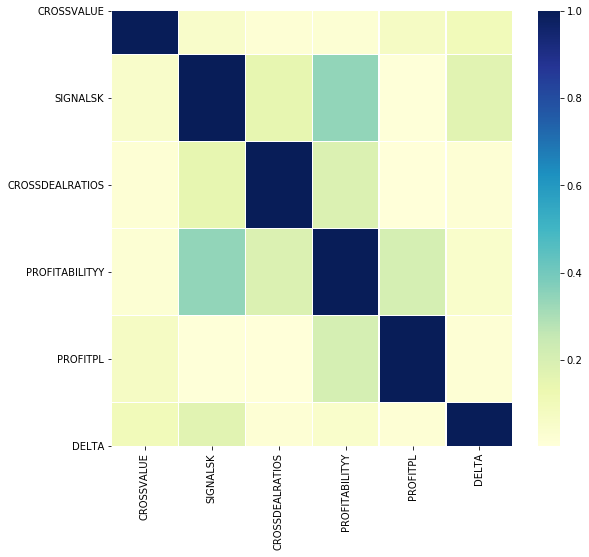

In [16]:
# Create correlation matrix
corr_matrix = X1_N_PCA[{'CROSSDEALRATIOS','PROFITPL','PROFITABILITYY','SIGNALSK',
    'CROSSVALUE','DELTA'}].corr().abs()

# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
#print(to_drop)
#print(corr_matrix)
from matplotlib import pyplot as plt
import seaborn as sns
#columns=['SIGNAL_ID', 'TRADEDATE', 'CROSSTURNOVER1', 'CROSSDEALRATIOS', 'EPSILONE', 'PROFITPL','PROFITABILITYY','SIGNALSK', 'RATINGCROSSDEALRATIOS', 'RATINGEPSILONE', 'RATINGPROFITPL', 'RATINGPROFITABILITYY', 'RATINGSIGNALSK', 'RATINGINTEGRAL','AGTDEV_BS', 'AGTDEV_PRICE', 'AGTDEV_VO', 'RATINGDEV', 'TRADEDATE_LAST', 'EVENT_ID','CROSSTURNOVER2','CROSSVALUE','AVGLIFETIME','RATINGAVGLIFETIME','USERGRADE_ID','SHORTNAME','IDENT','DETECTION_ID']
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

# (1.6) Делим выборку на train и test

In [17]:
# выделяем NOT_NOISE в отдельный датафрейм и удаляем из исходного
y1 = pd.DataFrame(X1['NOT_NOISE'], columns=['NOT_NOISE'])
y1_n = pd.DataFrame(X1_N['NOT_NOISE'], columns=['NOT_NOISE'])
X1 = X1.drop(['NOT_NOISE'], axis=1)
X1_N = X1_N.drop(['NOT_NOISE'], axis=1)
X1_PCA = X1_PCA.drop(['NOT_NOISE'], axis=1)
X1_N_PCA = X1_N_PCA.drop(['NOT_NOISE'], axis=1)
X1_COR = X1_COR.drop(['NOT_NOISE'], axis=1)
X1_N_COR = X1_N_COR.drop(['NOT_NOISE'], axis=1)

In [18]:
# создаем из всех датафреймов тренировочную и тестовую выборку
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state = 123)
x_n_train, x_n_test, y_n_train, y_n_test = train_test_split(X1_N, y1, test_size=0.30, random_state = 123)
x_pca_train, x_pca_test, y_train, y_test = train_test_split(X1_PCA, y1, test_size=0.30, random_state = 123)
x_n_pca_train, x_n_pca_test, y_n_train, y_n_test = train_test_split(X1_N_PCA, y1, test_size=0.30, random_state = 123)
x_cor_train, x_cor_test, y_train, y_test = train_test_split(X1_COR, y1, test_size=0.30, random_state = 123)
x_n_cor_train, x_n_cor_test, y_n_train, y_n_test = train_test_split(X1_N_COR, y1, test_size=0.30, random_state = 123)

# (1.7) Logit

### X1

In [72]:
# pip install mord
import mord

model = mord.LogisticAT(alpha=1)

model.fit(x_train, y_train)

model.predict(x_test)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [71]:
x_train.describe()

,CROSSDEALRATIOS,PROFITPL,PROFITABILITYY,SIGNALSK,AGTDEV_PRICE,AGTDEV_VOL,CROSSTURNOVER2,CROSSVALUE,DELTA,PCA
count,4406.000000,4.406000e+03,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4.406000e+03,4406.000000,4406.000000
mean,13.429641,4.962702e+04,22.495234,100.250794,0.764412,0.848389,0.074898,3.952204e+06,10075.771675,-0.002663
std,22.371691,2.411930e+06,57.951225,194.682079,0.660798,0.742228,0.263256,3.774318e+07,9983.688373,0.976104
min,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,-1.165094
25%,3.000000,5.300000e+01,2.000000,2.000000,0.000000,0.000000,0.000000,6.277500e+03,1725.000000,-1.142627
50%,4.000000,2.400000e+02,5.000000,7.000000,1.000000,1.000000,0.000000,2.994150e+04,6545.000000,0.268731
75%,11.000000,1.277500e+03,16.000000,75.000000,1.000000,1.000000,0.000000,2.225840e+05,16675.000000,0.268731
max,200.000000,1.587408e+08,730.000000,647.000000,2.000000,2.000000,1.000000,1.237580e+09,49767.000000,1.680089


### X1_N

### X1_PCA

### X1_N_PCA

### X1_COR

### X1_N_COR

# (1.8) Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [20]:
roc_auc_rf = []

### X1

#### Строим деревья  с параметрами по умолчанию

In [21]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
predicted_prob = forest.predict_proba(x_test)
predicted_class = forest.predict(x_test)
roc_auc = metrics.roc_auc_score(y_test, forest.predict(x_test))
# сохраняем roc_auc
roc_auc_rf.append(roc_auc)
print(roc_auc)

0.7640573382308776


/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [22]:
# создаем список из элементов вероятности попадания в класс NOT_NOISE = 1
predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_rf = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_rf = x1_rf.rename(columns = {0:'PROB_RF'})

#### Строим деревья  с перебором параметров и кросс-валидацией

In [24]:
%%time
# перебор параметров
parameters = {'n_estimators': [200,400,500],
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [5,10,15,20],
              'max_features': ['sqrt'],
              'min_samples_split': [18, 34, 44, 50],
              'min_samples_leaf': [12,28,50],
              'bootstrap': [True, False]
             }

'''# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'bootstrap': [False],
 'max_depth': [15],
 'max_features': ['sqrt'],
 'min_samples_leaf': [28],
 'min_samples_split': [50],
 'n_estimators': [400]}
'''
forest_best = GridSearchCV(forest, parameters, cv = 5, verbose = 1, n_jobs=-1)
forest_best.fit(x_train, y_train)
predicted_prob = forest_best.predict_proba(x_test)
predicted_class = forest_best.predict(x_test)
roc_auc = metrics.roc_auc_score(y_test, forest_best.predict(x_test))
x1_rf_best_params = forest_best.best_params_
print(roc_auc)
print(forest_best.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.2s finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.7119516251992515
{'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 28, 'min_samples_split': 50, 'n_estimators': 400}
CPU times: user 3.08 s, sys: 140 ms, total: 3.22 s
Wall time: 17.4 s


In [26]:
# сохраняем roc_auc
roc_auc_rf.append(roc_auc)

In [27]:
predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_rf_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_rf_cv = x1_rf_cv.rename(columns = {0:'PROB_RF_CV'})
# сливаем с предыдущим результатом
x1_rf = pd.merge(x1_rf, x1_rf_cv, how='left', left_index=True, right_index=True)

### X1_N

#### Строим деревья с параметрами по умолчанию¶

In [28]:
forest = RandomForestClassifier()
forest.fit(x_n_train, y_n_train)
predicted_prob = forest.predict_proba(x_n_test)
predicted_class = forest.predict(x_n_test)
roc_auc = metrics.roc_auc_score(y_n_test, forest.predict(x_n_test))
# сохраняем roc_auc
roc_auc_rf.append(roc_auc)
print(roc_auc)
# создаем список из элементов вероятности попадания в класс NOT_NOISE = 1
predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_n_rf = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_n_rf = x1_n_rf.rename(columns = {0:'PROB_N_RF'})
# сливаем с предыдущим результатом
x1_rf = pd.merge(x1_rf, x1_n_rf, how='left', left_index=True, right_index=True)

0.7433236306512347


/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


#### Строим деревья с перебором параметров и кросс-валидацией

In [34]:
%%time
# перебор параметров
parameters = {'n_estimators': [200,400,500],
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [5,10,15,20],
              'max_features': ['sqrt'],
              'min_samples_split': [18, 34, 44, 50],
              'min_samples_leaf': [12,28,50],
              'bootstrap': [True, False]
             }

'''# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'bootstrap': [False],
              'max_depth': [15], 
              'max_features': ['sqrt'], 
              'min_samples_leaf': [28],
              'min_samples_split': [50],
              'n_estimators': [200]}
'''
forest_best = GridSearchCV(forest, parameters, cv = 5, verbose = 1, n_jobs=-1)
forest_best.fit(x_n_train, y_n_train)
predicted_prob = forest_best.predict_proba(x_n_test)
predicted_class = forest_best.predict(x_n_test)
roc_auc = metrics.roc_auc_score(y_test, forest_best.predict(x_n_test))
x1_n_rf_best_params = forest_best.best_params_
print(roc_auc)
print(forest_best.best_params_)

roc_auc_rf.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_rf_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_rf_cv = x1_rf_cv.rename(columns = {0:'PROB_N_RF_CV'})
# сливаем с предыдущим результатом
x1_rf = pd.merge(x1_rf, x1_rf_cv, how='left', left_index=True, right_index=True)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 17.9min finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.7119516251992515
{'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 28, 'min_samples_split': 50, 'n_estimators': 200}
CPU times: user 9.77 s, sys: 646 ms, total: 10.4 s
Wall time: 17min 55s


### X1_PCA

#### Строим деревья с параметрами по умолчанию¶

In [42]:
forest = RandomForestClassifier()
forest.fit(x_pca_train, y_train)
predicted_prob = forest.predict_proba(x_pca_test)
predicted_class = forest.predict(x_pca_test)
roc_auc = metrics.roc_auc_score(y_test, forest.predict(x_pca_test))
# сохраняем roc_auc
roc_auc_rf.append(roc_auc)
print(roc_auc)
# создаем список из элементов вероятности попадания в класс NOT_NOISE = 1
predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_pca_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_n_rf = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_n_rf = x1_n_rf.rename(columns = {0:'PROB_PCA_RF'})
# сливаем с предыдущим результатом
x1_rf = pd.merge(x1_rf, x1_n_rf, how='left', left_index=True, right_index=True)

0.7957007877653799


/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


#### Строим деревья с перебором параметров и кросс-валидацией

In [43]:
%%time
# перебор параметров
parameters = {'n_estimators': [200,400,500],
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [5,10,15,20],
              'max_features': ['sqrt'],
              'min_samples_split': [18, 34, 44, 50],
              'min_samples_leaf': [12,28,50],
              'bootstrap': [True, False]
             }

'''# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'bootstrap': [False], 
              'max_depth': [20], 
              'max_features': ['sqrt'], 
              'min_samples_leaf': [28], 
              'min_samples_split': [34], 
              'n_estimators': [500]}
'''
forest_best = GridSearchCV(forest, parameters, cv = 5, verbose = 1, n_jobs=-1)
forest_best.fit(x_pca_train, y_train)
predicted_prob = forest_best.predict_proba(x_pca_test)
predicted_class = forest_best.predict(x_pca_test)
roc_auc = metrics.roc_auc_score(y_test, forest_best.predict(x_pca_test))
x1_pca_rf_best_params = forest_best.best_params_
print(roc_auc)
print(forest_best.best_params_)

roc_auc_rf.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_pca_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_rf_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_rf_cv = x1_rf_cv.rename(columns = {0:'PROB_PCA_RF_CV'})
# сливаем с предыдущим результатом
x1_rf = pd.merge(x1_rf, x1_rf_cv, how='left', left_index=True, right_index=True)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 21.3min finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.7119516251992515
{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 28, 'min_samples_split': 34, 'n_estimators': 500}
CPU times: user 12.8 s, sys: 883 ms, total: 13.6 s
Wall time: 21min 21s


### X1_N_PCA

#### Строим деревья с параметрами по умолчанию¶

In [46]:
forest = RandomForestClassifier()
forest.fit(x_n_pca_train, y_n_train)
predicted_prob = forest.predict_proba(x_n_pca_test)
predicted_class = forest.predict(x_n_pca_test)
roc_auc = metrics.roc_auc_score(y_n_test, forest.predict(x_n_pca_test))
# сохраняем roc_auc
roc_auc_rf.append(roc_auc)
print(roc_auc)
# создаем список из элементов вероятности попадания в класс NOT_NOISE = 1
predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_pca_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_n_rf = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_n_rf = x1_n_rf.rename(columns = {0:'PROB_N_PCA_RF'})
# сливаем с предыдущим результатом
x1_rf = pd.merge(x1_rf, x1_n_rf, how='left', left_index=True, right_index=True)

0.7736098597731421


/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


#### Строим деревья с перебором параметров и кросс-валидацией

In [47]:
%%time
# перебор параметров
parameters = {'n_estimators': [200,400,500],
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [5,10,15,20],
              'max_features': ['sqrt'],
              'min_samples_split': [18, 34, 44, 50],
              'min_samples_leaf': [12,28,50],
              'bootstrap': [True, False]
             }

'''# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'bootstrap': [False],
              'max_depth': [5],
              'max_features': ['sqrt'],
              'min_samples_leaf': [28],
              'min_samples_split': [18],
              'n_estimators': [200]}'''

forest_best = GridSearchCV(forest, parameters, cv = 5, verbose = 1, n_jobs=-1)
forest_best.fit(x_n_pca_train, y_n_train)
predicted_prob = forest_best.predict_proba(x_n_pca_test)
predicted_class = forest_best.predict(x_n_pca_test)
roc_auc = metrics.roc_auc_score(y_n_test, forest_best.predict(x_n_pca_test))
x1_n_pca_rf_best_params = forest_best.best_params_
print(roc_auc)
print(forest_best.best_params_)

roc_auc_rf.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_pca_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_rf_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_rf_cv = x1_rf_cv.rename(columns = {0:'PROB_N_PCA_RF_CV'})
# сливаем с предыдущим результатом
x1_rf = pd.merge(x1_rf, x1_rf_cv, how='left', left_index=True, right_index=True)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 19.6min finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.7013133273269111
{'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 28, 'min_samples_split': 18, 'n_estimators': 200}
CPU times: user 9.5 s, sys: 610 ms, total: 10.1 s
Wall time: 19min 35s


### X1_COR

#### Строим деревья с параметрами по умолчанию¶

In [49]:
forest = RandomForestClassifier()
forest.fit(x_cor_train, y_train)
predicted_prob = forest.predict_proba(x_cor_test)
predicted_class = forest.predict(x_cor_test)
roc_auc = metrics.roc_auc_score(y_test, forest.predict(x_cor_test))
# сохраняем roc_auc
roc_auc_rf.append(roc_auc)
print(roc_auc)
# создаем список из элементов вероятности попадания в класс NOT_NOISE = 1
predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_cor_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_n_rf = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_n_rf = x1_n_rf.rename(columns = {0:'PROB_COR_RF'})
# сливаем с предыдущим результатом
x1_rf = pd.merge(x1_rf, x1_n_rf, how='left', left_index=True, right_index=True)

0.7419664102386397


/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


#### Строим деревья с перебором параметров и кросс-валидацией

In [50]:
%%time
parameters = {'n_estimators': [200,400,500],
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [5,10,15,20],
              'max_features': ['sqrt'],
              'min_samples_split': [18, 34, 44, 50],
              'min_samples_leaf': [12,28,50],
              'bootstrap': [True, False]
             }

'''# результаты поиска по сетке, для ускорения можно использовать сразу их
parameters = {'bootstrap': [False], 
              'max_depth': [10], 
              'max_features': ['sqrt'], 
              'min_samples_leaf': [12], 
              'min_samples_split': [34], 
              'n_estimators': [200]}'''

forest_best = GridSearchCV(forest, parameters, cv = 5, verbose = 1, n_jobs=-1)
forest_best.fit(x_cor_train, y_train)
predicted_prob = forest_best.predict_proba(x_cor_test)
predicted_class = forest_best.predict(x_cor_test)
roc_auc = metrics.roc_auc_score(y_test, forest_best.predict(x_cor_test))
x1_cor_rf_best_params = forest_best.best_params_
print(roc_auc)
print(forest_best.best_params_)

roc_auc_rf.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_cor_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_rf_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_rf_cv = x1_rf_cv.rename(columns = {0:'PROB_COR_RF_CV'})
# сливаем с предыдущим результатом
x1_rf = pd.merge(x1_rf, x1_rf_cv, how='left', left_index=True, right_index=True)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 18.4min finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.7326853327788944
{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 34, 'n_estimators': 200}
CPU times: user 10.1 s, sys: 577 ms, total: 10.7 s
Wall time: 18min 27s


### X1_N_COR

#### Строим деревья с параметрами по умолчанию¶

In [52]:
forest = RandomForestClassifier()
forest.fit(x_n_cor_train, y_n_train)
predicted_prob = forest.predict_proba(x_n_cor_test)
predicted_class = forest.predict(x_n_cor_test)
roc_auc = metrics.roc_auc_score(y_n_test, forest.predict(x_n_cor_test))
# сохраняем roc_auc
roc_auc_rf.append(roc_auc)
print(roc_auc)
# создаем список из элементов вероятности попадания в класс NOT_NOISE = 1
predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_cor_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_n_rf = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_n_rf = x1_n_rf.rename(columns = {0:'PROB_N_COR_RF'})
# сливаем с предыдущим результатом
x1_rf = pd.merge(x1_rf, x1_n_rf, how='left', left_index=True, right_index=True)

0.7315995564488184


/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


#### Строим деревья с перебором параметров и кросс-валидацией

In [53]:
%%time
parameters = {'n_estimators': [200,400,500],
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [5,10,15,20],
              'max_features': ['sqrt'],
              'min_samples_split': [18, 34, 44, 50],
              'min_samples_leaf': [12,28,50],
              'bootstrap': [True, False]
             }

# результаты поиска по сетке, для ускорения можно использовать сразу их
'''parameters = {'bootstrap': [False], 
              'max_depth': [10], 
              'max_features': ['sqrt'], 
              'min_samples_leaf': [12], 
              'min_samples_split': [18], 
              'n_estimators':[500]}
'''
forest_best = GridSearchCV(forest, parameters, cv = 5, verbose = 1, n_jobs=-1)
forest_best.fit(x_n_cor_train, y_n_train)
predicted_prob = forest_best.predict_proba(x_n_cor_test)
predicted_class = forest_best.predict(x_n_cor_test)
roc_auc = metrics.roc_auc_score(y_n_test, forest_best.predict(x_n_cor_test))
x1_n_cor_rf_best_params = forest_best.best_params_
print(roc_auc)
print(forest_best.best_params_)

roc_auc_rf.append(roc_auc)

predicted_results = []

for a in range(len(predicted_prob)):
    
    predicted_results.append(predicted_prob[a][1])
    
index_list = x_n_cor_test.index.tolist()
# записываем вероятность попадания в класс 1 в новый датафрейм
x1_rf_cv = pd.DataFrame(pd.Series(data=predicted_results, index=index_list))
x1_rf_cv = x1_rf_cv.rename(columns = {0:'PROB_N_COR_RF_CV'})
# сливаем с предыдущим результатом
x1_rf = pd.merge(x1_rf, x1_rf_cv, how='left', left_index=True, right_index=True)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 19.0min finished
/Users/ekaterina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.7220470349065539
{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 18, 'n_estimators': 500}
CPU times: user 12.7 s, sys: 663 ms, total: 13.3 s
Wall time: 19min 5s


In [71]:
# собираем roc_auc в один датафрейм
roc_auc = pd.DataFrame(roc_auc_rf, index=['X1','X1_CV', 'X1_N','X1_N_CV','X1_PCA','X1_PCA_CV','X1_N_PCA','X1_N_PCA_CV','X1_COR','X1_COR_CV','X1_N_COR','X1_N_COR_CV'])
roc_auc = roc_auc.rename(columns = {0:'RANDOM_FOREST'})
roc_auc

,RANDOM_FOREST
X1,0.764057
X1_CV,0.711952
X1_N,0.743324
X1_N_CV,0.711952
X1_PCA,0.795701
X1_PCA_CV,0.711952
X1_N_PCA,0.773610
X1_N_PCA_CV,0.701313
X1_COR,0.741966
X1_COR_CV,0.732685


In [76]:
# добавляем первый столбец с истинными значениями
x1_rf = pd.merge(y_test, x1_rf, how='left', left_index=True, right_index=True)
x1_rf

,NOT_NOISE,PROB_RF,PROB_RF_CV,PROB_N_RF,PROB_N_RF_CV,PROB_PCA_RF,PROB_PCA_RF_CV,PROB_N_PCA_RF,PROB_N_PCA_RF_CV,PROB_COR_RF,PROB_COR_RF_CV,PROB_N_COR_RF,PROB_N_COR_RF_CV
4437,1,1.0,0.784899,1.0,0.794061,1.0,0.743440,1.0,0.748624,1.0,0.848181,1.0,0.888953
1109,0,0.0,0.000320,0.0,0.000156,0.0,0.000267,0.0,0.002815,0.0,0.000436,0.0,0.000018
1388,0,0.0,0.000184,0.0,0.000360,0.0,0.000207,0.0,0.004703,0.0,0.000961,0.0,0.000838
5610,0,0.0,0.000298,0.0,0.000154,0.0,0.000043,0.0,0.004245,0.0,0.000115,0.0,0.000096
5050,0,0.0,0.001651,0.0,0.001438,0.0,0.002155,0.0,0.006060,0.0,0.001891,0.0,0.000831
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,0,0.0,0.035099,0.1,0.032511,0.0,0.041892,0.0,0.042340,0.0,0.058486,0.1,0.056883
5563,0,0.0,0.044579,0.0,0.035875,0.1,0.049008,0.0,0.043373,0.0,0.064764,0.0,0.054352
5425,0,0.0,0.096612,0.1,0.087144,0.0,0.081736,0.0,0.078429,0.0,0.045053,0.0,0.039624
5386,0,0.2,0.435622,0.1,0.462723,0.2,0.424619,0.3,0.419580,0.4,0.404375,0.2,0.408645
